# Importing the pandas library
# Importing the numpy library

In [ ]:
import pandas as pd
import numpy as np

# Reading a CSV file into a pandas DataFrame

In [38]:
data = pd.read_csv(r'amazon_electronics.csv')

# Printing the column names of the DataFrame

In [39]:
print(data.columns)

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')


# Displaying a summary of the DataFrame’s information

In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090810 entries, 0 to 3090809
Data columns (total 16 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
 15  sentiment          object
dtypes: int64(5), object(11)
memory usage: 377.3+ MB
None


## Creating a ‘sentiment’ column based on ‘star_rating’ and checking for required columns
## here we will mark 3 star rating as neutral and above 3 as positive sentiment and below 3 as negative sentiment

In [41]:
if 'star_rating' in data.columns and 'review_body' in data.columns:
    # Create 'sentiment' column based on 'star_rating'
    data['sentiment'] = np.where(data['star_rating'] < 3.0, 'negative',
                                 np.where(data['star_rating'] == 3.0, 'neutral', 'positive'))
    print(data.head())
else:
    print("Required columns not found in the DataFrame.")


  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     41409413  R2MTG1GCZLR2DK  B00428R89M       112201306   
1          US     49668221  R2HBOEM8LE9928  B000068O48       734576678   
2          US     12338275  R1P4RW1R9FDPEE  B000GGKOG8       614448099   
3          US     38487968  R1EBPM82ENI67M  B000NU4OTA        72265257   
4          US     23732619  R372S58V6D11AT  B00JOQIO6S       308169188   

                                       product_title product_category  \
0  yoomall 5M Antenna WIFI RP-SMA Female to Male ...      Electronics   
1         Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor      Electronics   
2        Channel Master Titan 2 Antenna Preamplifier      Electronics   
3  LIMTECH Wall charger + USB Hotsync & Charging ...      Electronics   
4     Skullcandy Air Raid Portable Bluetooth Speaker      Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

# To visualize the data to see if it is balanced or unbalanced
## as we can see the positive class sentiments are much more as compared to other sentiments
## next step will be balancing the data

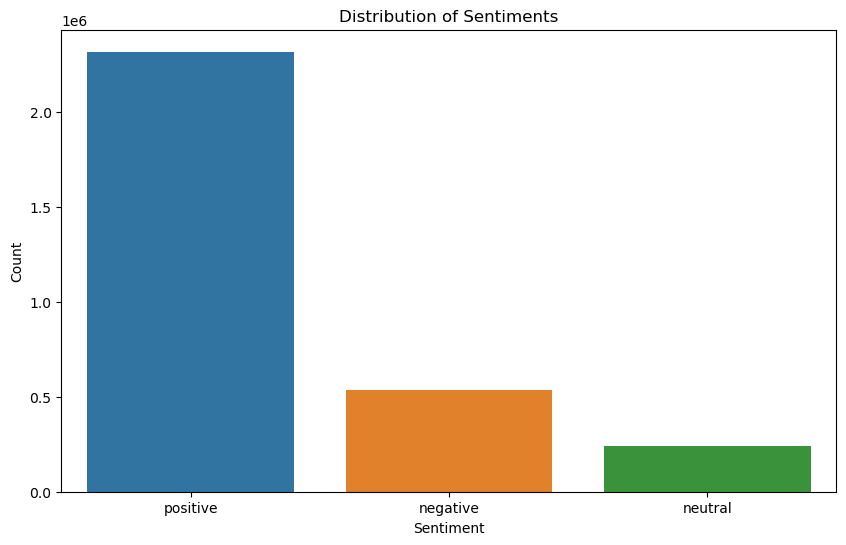

In [42]:
#JUst to visualize the data if it is unbalanced or not 
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier

In [9]:
# #split data-set to train and test
 
from sklearn.utils import resample
import pandas as pd
 
 
X = data['review_body']
Y = data['sentiment']
 
# # Combine X (features) and Y (labels) into a single DataFrame
# data_balanced = pd.DataFrame({'review_body': data['review_body'], 'sentiment': data['sentiment']})
 
# Get the minimum count among all classes
min_class_count = data['sentiment'].value_counts().min()
 
# Create a balanced dataset by sampling min_class_count from each class
data = data.groupby('sentiment', group_keys=False).apply(
    lambda x: x.sample(min_class_count, random_state=42)
)
 
# Extract balanced X and Y
X_sub = data.drop(columns=['sentiment'])
Y_sub = data['sentiment']
_, X_sub_, _, Y_sub_ = train_test_split(X_sub, Y_sub, test_size = 0.6, random_state=42,stratify=Y_sub)
 
# Verify class distribution
print("Class distribution in balanced subsample:")
print(Y_sub_.value_counts())
 
data_final = pd.concat([X_sub_, Y_sub_], axis=1)


Class distribution in balanced subsample:
sentiment
positive    143024
neutral     143023
negative    143023
Name: count, dtype: int64


In [10]:
data_final.shape

(429070, 16)

In [11]:
data_final.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
1712466,US,12071054,R20CNBILAVM0JT,B00009W3HS,914879448,Sentry CD/DVD Wallet Holder,Electronics,5,0,0,N,N,pack and go,as a proud grandmother shuffling with the kidd...,2013-11-24,positive
2175934,US,42456976,RPFIK94UTNCLG,B002AZ5FIA,908238666,iLuv Vibro I Bed Shaker 30-Pin iPod/iPhone Ala...,Electronics,3,0,0,N,Y,"An average alarm clock, it's ehh.",The alarm clock is a playful light pink color ...,2013-01-10,neutral
1806926,US,8524140,R319ABAQTEZQ27,B00B9DQ2QI,222265725,Chromo Inc® 2x Pack 3.5mm Auxiliary Cable 1 An...,Electronics,1,0,0,N,Y,Lasted maybe a week,Used the first one of these for maybe a week b...,2013-09-15,negative
1348932,US,46341915,R1X73OM5FSRRH5,B000OTEZ5I,481891670,CyberPower Intelligent LCD UPS Compact,Electronics,2,0,0,N,Y,Software wont open,I installed the cd so I can check unit on-scre...,2014-06-07,negative
1713770,US,19694742,R3BGMU4QIQ07JO,B000W6IE0A,301890787,Elegante Fixed Frame Screen (Discontinued by M...,Electronics,4,0,0,N,N,New Version Better,"It's a good screen, but I just bought the new ...",2013-11-23,positive


In [12]:
data=data_final.copy()

# DISTRIBUTION OF STAR RATINGS
## Displays the frequency of each star rating (from 1 to 5) in the dataset.
## Helps identify how reviews are distributed, indicating whether the feedback leans positive, negative, or neutral

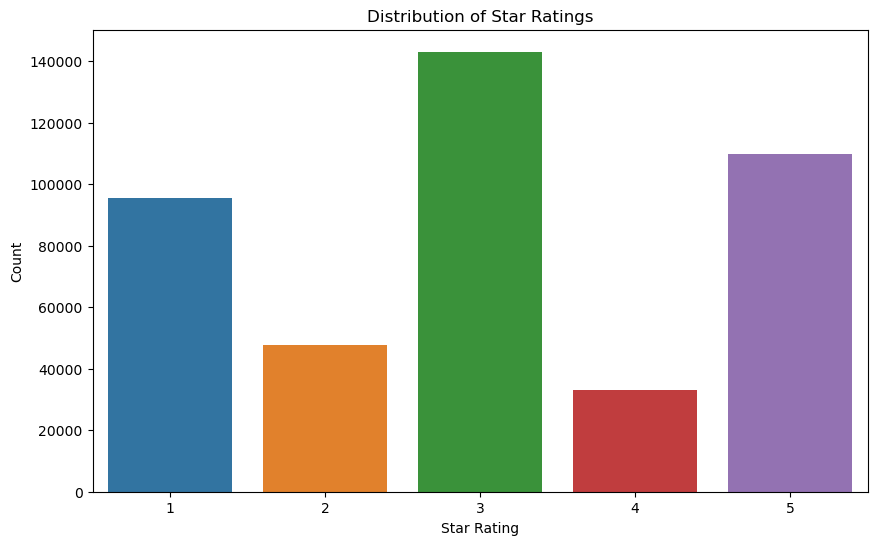

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', data=data)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


# Distribution of Sentiments
## total counts of the negative, neutral and postive class after balancing dataset

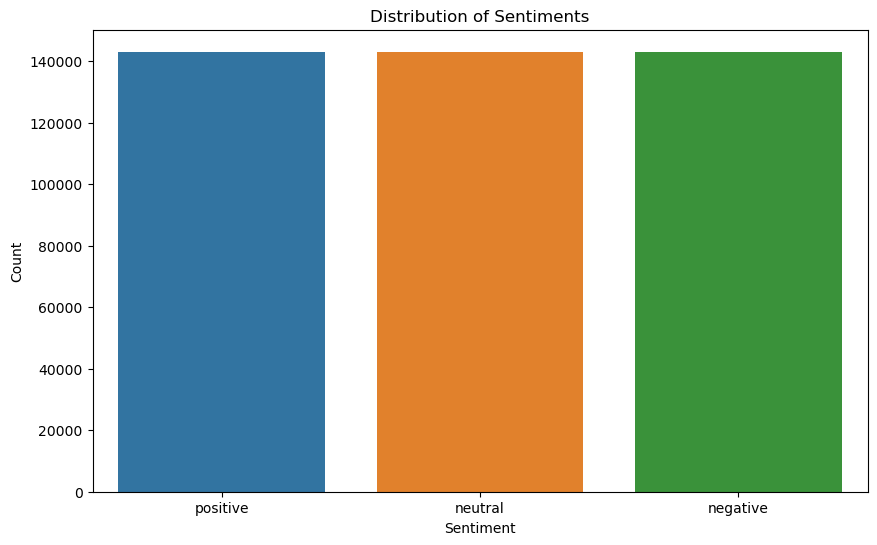

In [14]:
#ploting the figure of the balanced datset to visualize it 
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Distribution of Helpful Votes vs star rating
## Higher star ratings may receive more helpful votes if they align with customer expectations.
 
## Description: Plots the total helpful votes for reviews corresponding to each star rating.

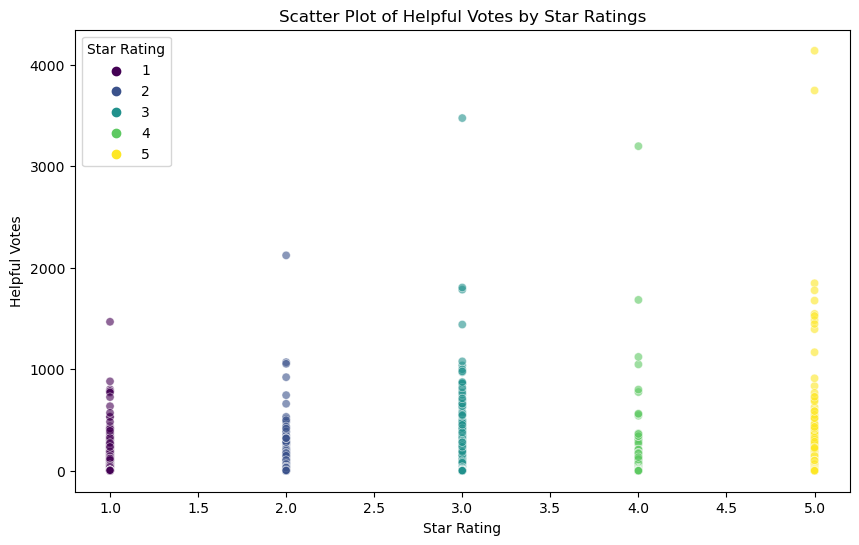

In [15]:
# Assuming 'data' DataFrame is already defined and contains 'star_rating' and 'helpful_votes' columns

# Create the scatter plot with the same color scale as the previous plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='star_rating', 
    y='helpful_votes', 
    data=data, 
    hue='star_rating', 
    palette='viridis', 
    alpha=0.6, 
    edgecolor='w', 
    linewidth=0.5
)
plt.title('Scatter Plot of Helpful Votes by Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.legend(title='Star Rating')
plt.show()


# Distribution of Total Votes
## Description: Compares the total number of votes (helpful + not helpful) for reviews across different star ratings.

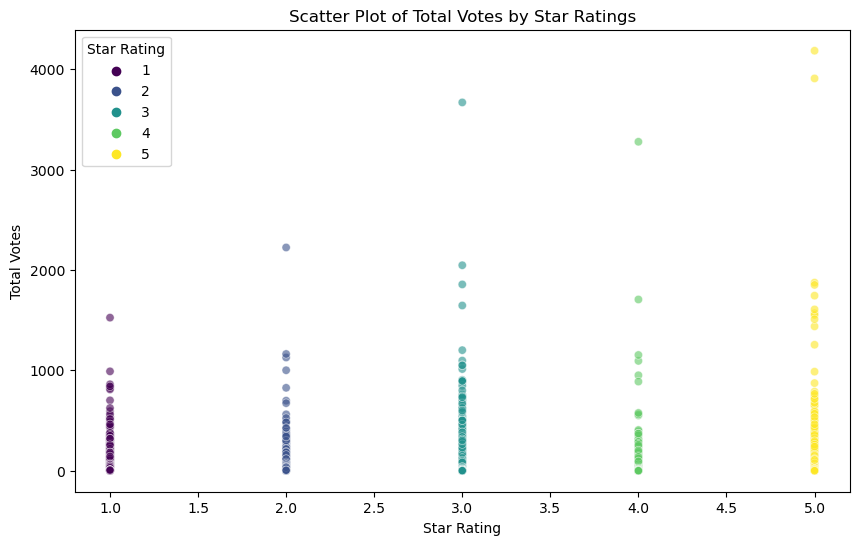

In [16]:
# Create the scatter plot with the same color scale as the previous plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='star_rating', 
    y='total_votes', 
    data=data, 
    hue='star_rating', 
    palette='viridis', 
    alpha=0.6, 
    edgecolor='w', 
    linewidth=0.5
)
plt.title('Scatter Plot of Total Votes by Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Total Votes')
plt.legend(title='Star Rating')
plt.show()

# Number of Reviews Over Time
## Plots the count of reviews received in each time period (e.g., by month or year).
 
## Sharp spikes during sales events (e.g., Black Friday, festive seasons).
 
## An increasing trend indicates growing customer engagement or popularity of products
## As we can see the review increses with time but not strictly increasing

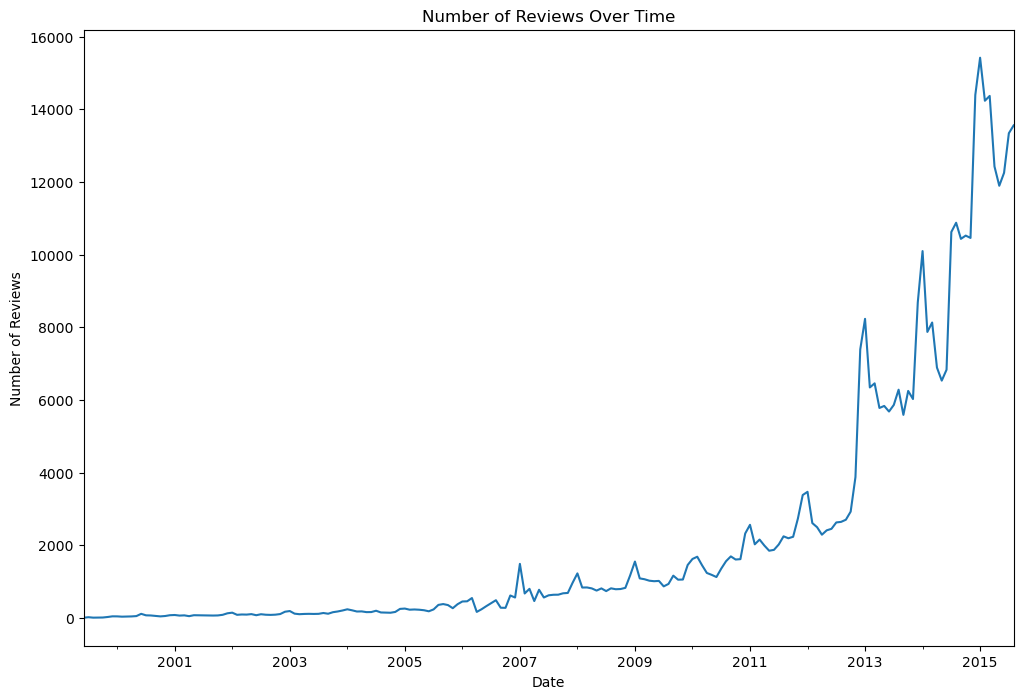

In [17]:
#plotting tghe graph to see the market trend review overtime as we can see the review increses with time but not strictly incresing
data['review_date'] = pd.to_datetime(data['review_date'])
reviews_over_time = data.groupby(data['review_date'].dt.to_period('M')).size()
plt.figure(figsize=(12, 8))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


# plotting Sentiment overtime
##   Tracks the sentiment count of reviews (positive/negative/neutral) over time
 
## Negative sentiment spikes due to defective batches, shipping delays, or major controversies.
 
## Positive sentiment spikes after product updates or successful marketing campaigns

<Figure size 2000x1200 with 0 Axes>

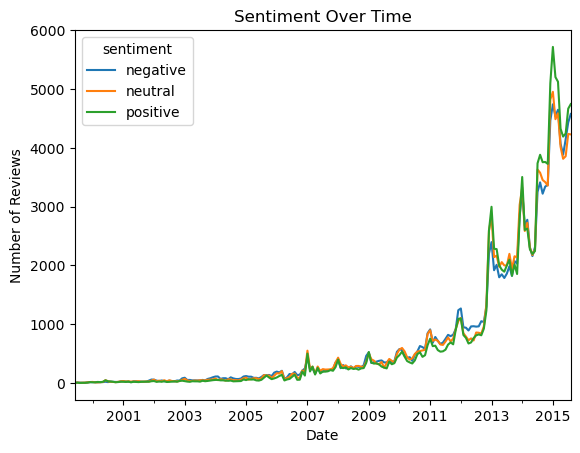

In [33]:
#plotting the sentiment over time to see the product performce if the customer likes it or not
sentiment_over_time = data.groupby([data['review_date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)
plt.figure(figsize=(20, 12))
sentiment_over_time.plot()
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


# Average Helpful Votes by Sentiment
## Identifies which sentiment is considered most helpful by the audience.
 
## Negative reviews often get more helpful votes if they highlight valid concerns, while positive reviews might get fewer helpful votes if they're generic.

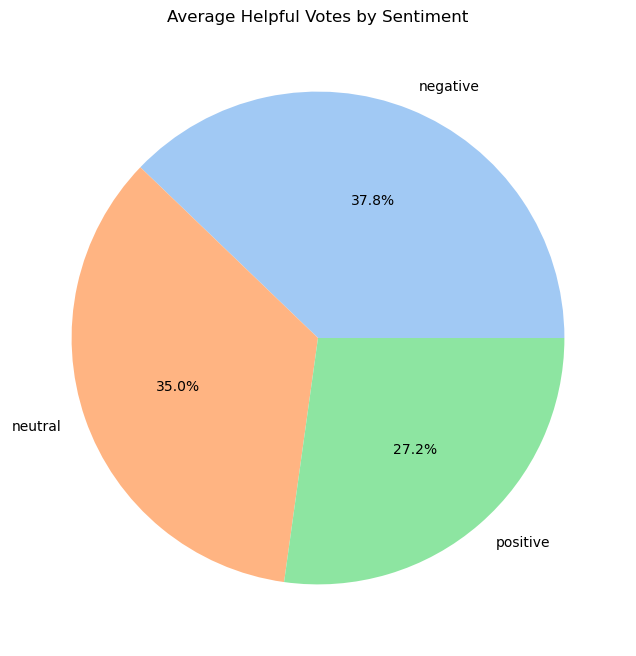

In [19]:
avg_helpful_votes_by_sentiment = data.groupby('sentiment')['helpful_votes'].mean().sort_values(ascending=False)

# Create a colorful pie chart for average helpful votes by sentiment
plt.figure(figsize=(12, 8))
avg_helpful_votes_by_sentiment.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Average Helpful Votes by Sentiment')
plt.ylabel('')  # Remove y-label for better visualization
plt.show()

# Average Total Votes by Sentiment
## Helps understand which sentiment category receives more attention overall.
 
## For example, negative reviews might receive more total votes due to their critical nature, while positive ones might have moderate engagement.

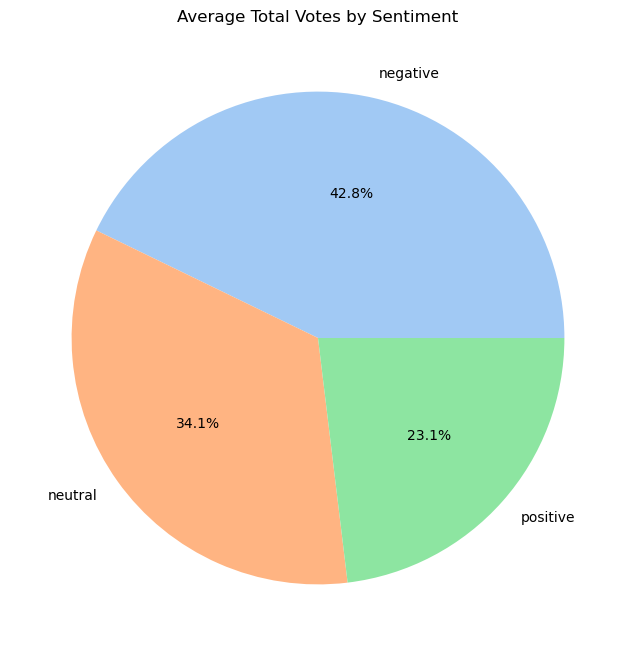

In [20]:
avg_total_votes_by_sentiment = data.groupby('sentiment')['total_votes'].mean().sort_values(ascending=False)

# Create a colorful pie chart for average total votes by sentiment
plt.figure(figsize=(12, 8))
avg_total_votes_by_sentiment.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Average Total Votes by Sentiment')
plt.ylabel('')  # Remove y-label for better visualization
plt.show()

# Top 10 Reviewers by Number of Reviews
## Highlights customers who are frequent reviewers, potentially identifying brand advocates or critics.
 
## Count the number of reviews per customer and sort in descending order.

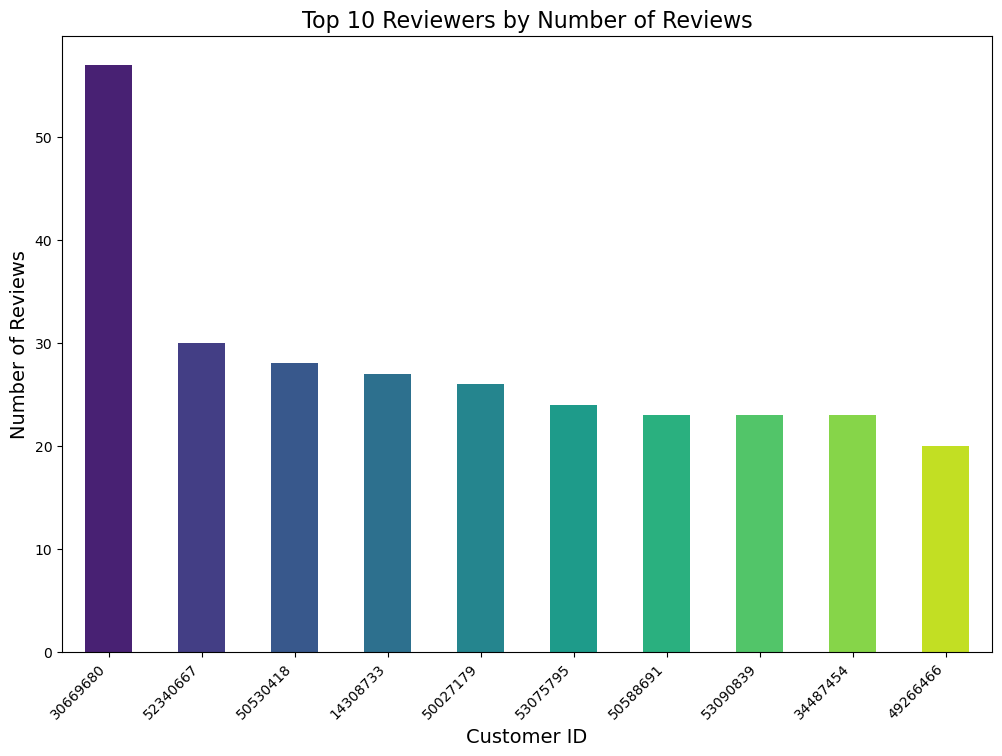

In [21]:
top_reviewers = data['customer_id'].value_counts().head(10)

# Create a bar graph with colors for top 10 reviewers by number of reviews
plt.figure(figsize=(12, 8))
top_reviewers.plot(kind='bar', color=sns.color_palette('viridis', len(top_reviewers)))
plt.title('Top 10 Reviewers by Number of Reviews', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Review Headline Lengths
## Short headlines might indicate concise summaries (e.g., "Amazing product!").
 
## Longer headlines may convey detailed thoughts or sentiments

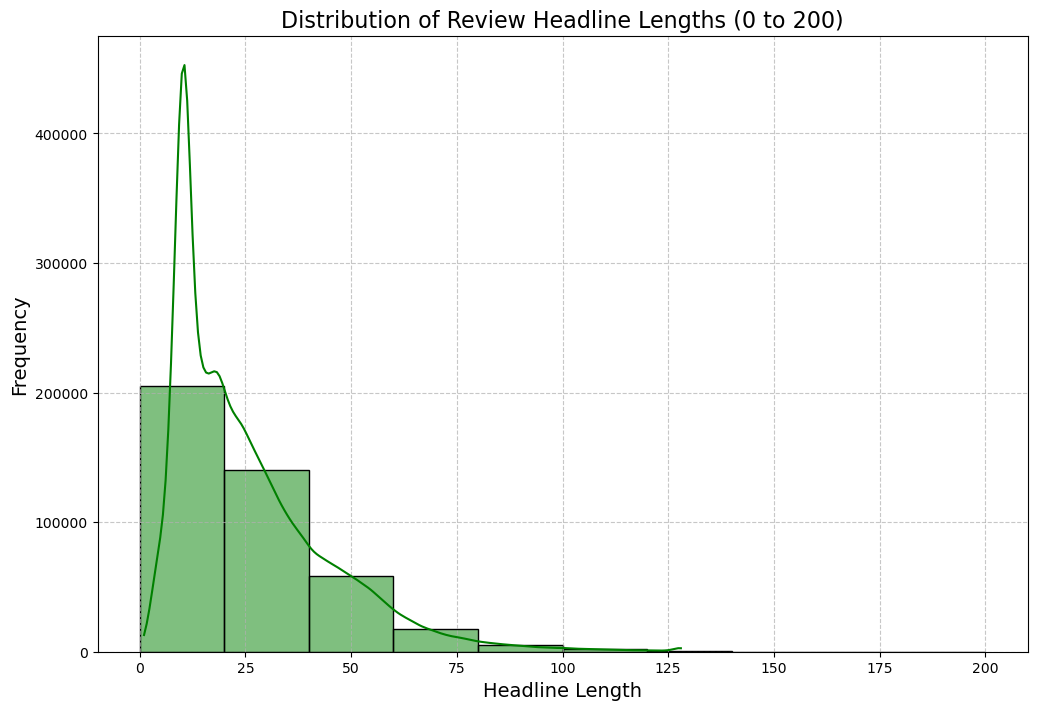

In [22]:
# Calculate the length of each review headline
data['headline_length'] = data['review_headline'].apply(len)

# Filter the data to include headline lengths from 0 to 200 only
filtered_data = data[(data['headline_length'] >= 0) & (data['headline_length'] <= 200)]

# Create bins with gaps of 20
bins = range(0, 220, 20)

# Create a histogram with gaps of 20 for headline lengths from 0 to 200
plt.figure(figsize=(12, 8))
sns.histplot(filtered_data['headline_length'], bins=bins, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Review Headline Lengths (0 to 200)', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Average Review Headline Length by Sentiment
## Highlights how detailed (or concise) the headlines are for reviews of different sentiment categories.
 
## Displays the proportion of average headline lengths (character count or word count) categorized by sentiment (positive, neutral, negative).

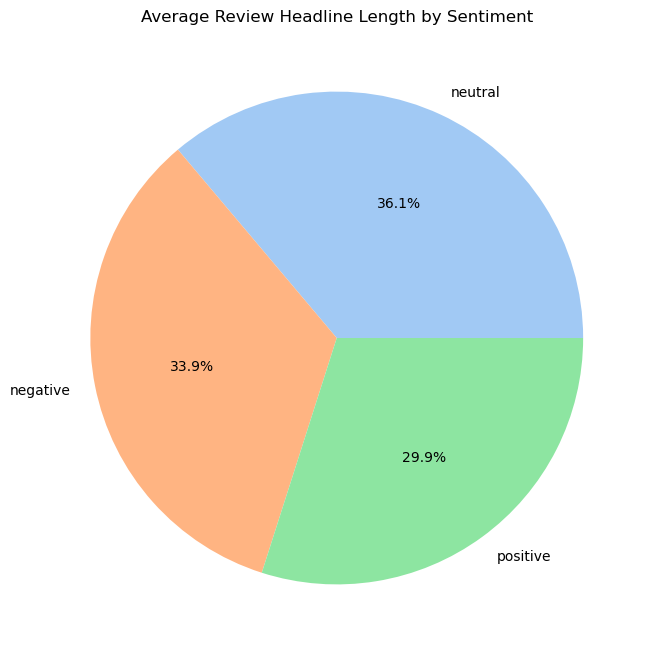

In [23]:
# Calculate the length of each review headline
data['headline_length'] = data['review_headline'].apply(len)

# Calculate the average review headline length by sentiment
avg_headline_length_by_sentiment = data.groupby('sentiment')['headline_length'].mean().sort_values(ascending=False)

# Create a colorful pie chart for average review headline length by sentiment
plt.figure(figsize=(12, 8))
avg_headline_length_by_sentiment.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Average Review Headline Length by Sentiment')
plt.ylabel('')  # Remove y-label for better visualization
plt.show()

# Distribution of Review Lengths by Sentiment
## Shorter reviews are often concise summaries (e.g., "Great product!").
 
## Longer reviews may provide detailed feedback, possibly indicating strong sentiments.
 
## Shows the distribution of review lengths for all reviews.

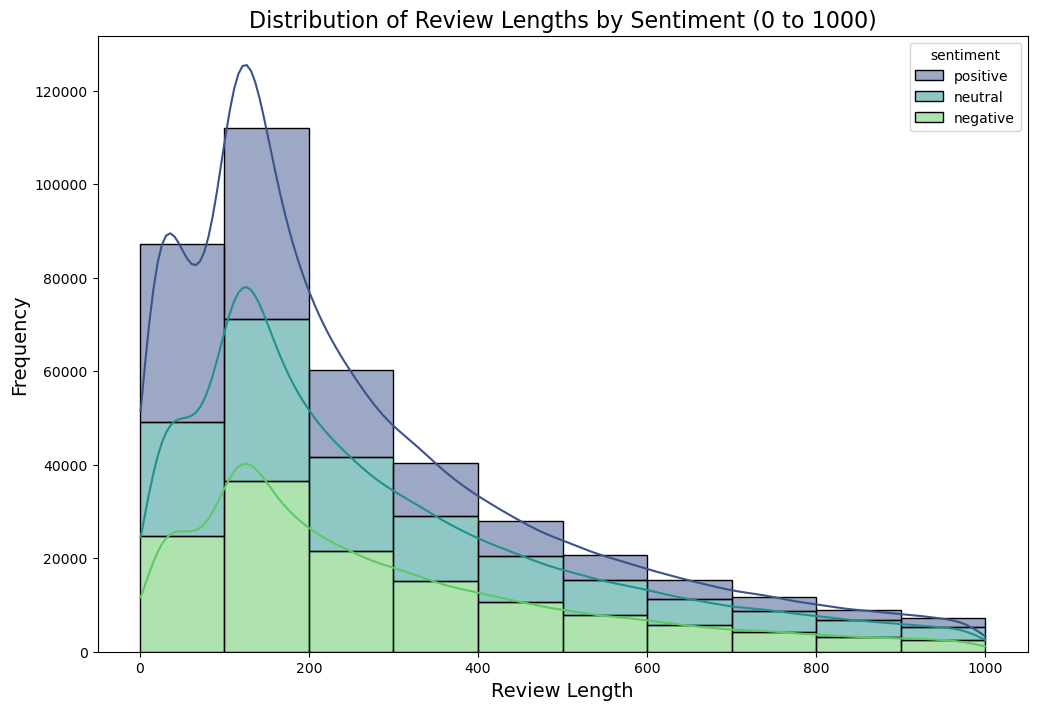

In [24]:

# Calculate the length of each review body
data['review_length'] = data['review_body'].apply(len)

# Filter the data to include review lengths from 0 to 1000 only
filtered_data = data[(data['review_length'] >= 0) & (data['review_length'] <= 1000)]

# Create bins with gaps of 100
bins = range(0, 1100, 100)

# Create a histogram with gaps of 100 for review lengths from 0 to 1000
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='review_length', bins=bins, kde=True, hue='sentiment', multiple='stack', palette='viridis')
plt.title('Distribution of Review Lengths by Sentiment (0 to 1000)', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


# Heatmap of Review Length by Star Rating and Sentiment


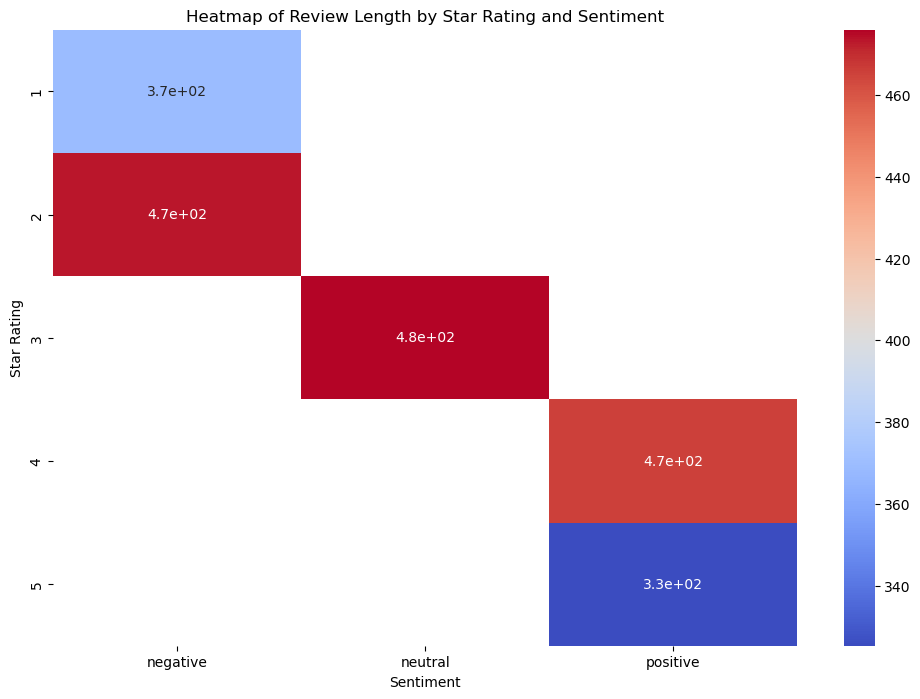

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.pivot_table(index='star_rating', columns='sentiment', values='review_length', aggfunc='mean'), annot=True, cmap='coolwarm')
plt.title('Heatmap of Review Length by Star Rating and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Star Rating')
plt.show()


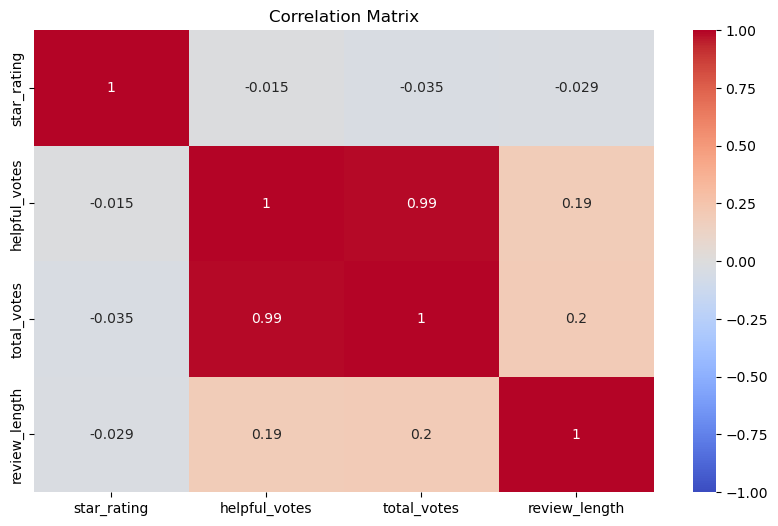

In [26]:
# Generate the correlation matrix
corr_matrix = data[['star_rating', 'helpful_votes', 'total_votes', 'review_length']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Popularity by Star Rating (Scatter Plot)
## Helps understand which star ratings attract the most attention.
 
## Reviews with extreme ratings (1-star or 5-star) might get more votes,
 
## reflecting higher engagement. Each data point represents a review with its star rating and its popularity metric.

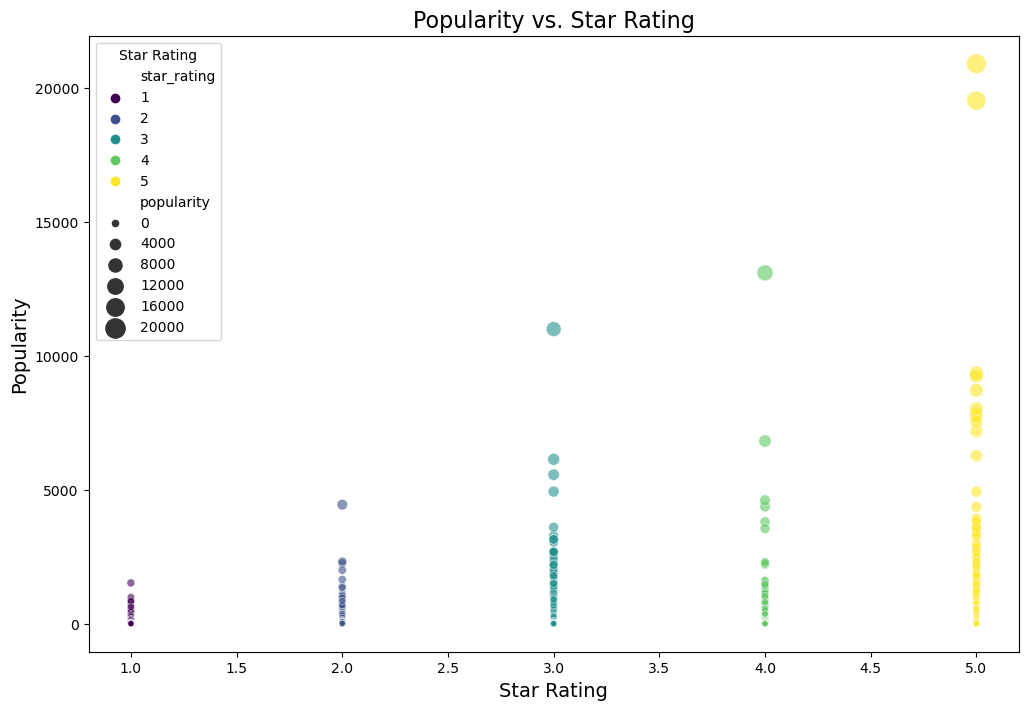

In [27]:
# Creating a custom column popularity using stars * no_of_reviews (total_votes)
data['popularity'] = data['star_rating'] * data['total_votes']

# Create a more visually appealing scatter plot for popularity vs. star rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='star_rating', y='popularity', data=data, hue='star_rating', palette='viridis', size='popularity', sizes=(20, 200), alpha=0.6, edgecolor='w', linewidth=0.5)
plt.title('Popularity vs. Star Rating', fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.legend(title='Star Rating')
plt.show()

# Helpfulness Ratio vs. Star Rating
## Relationship: Analyze how the helpfulness of reviews varies with the star rating.
## below as you can see the positive has more helpness ratio as compared to other sentiments


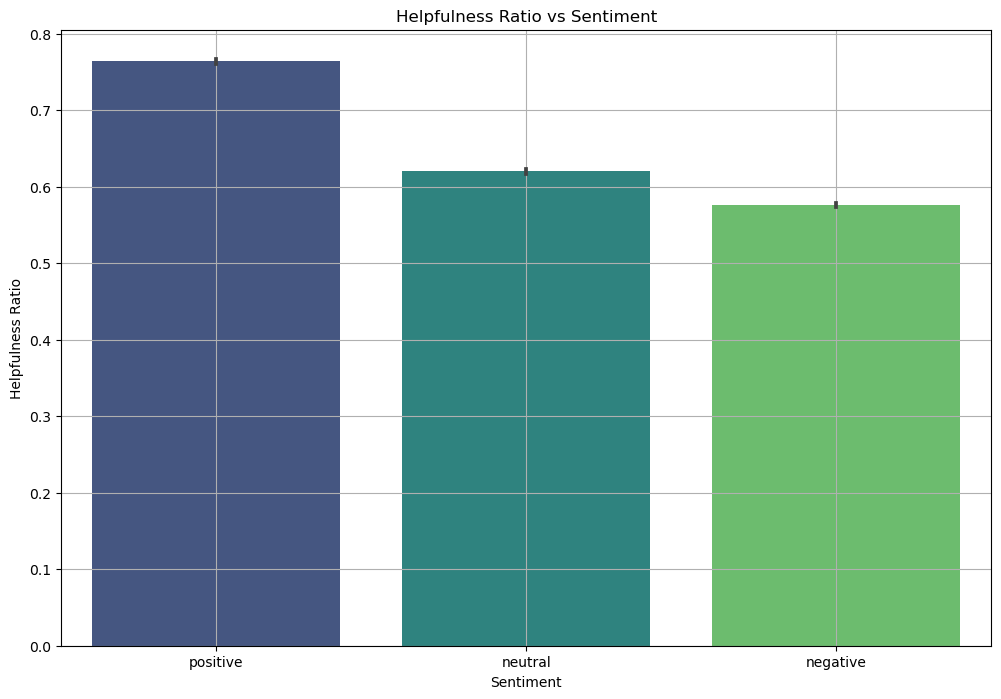

In [34]:


# Calculate helpfulness ratio
data['helpfulness_ratio'] = data['helpful_votes'] / data['total_votes']
# Alternatively, plotting a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='helpfulness_ratio', palette='viridis', data=data)
plt.title('Helpfulness Ratio vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Helpfulness Ratio')
plt.grid(True)
plt.show()


# Total Votes vs. Helpfulness Votes
## Relationship: Compare the total votes a review gets to the number of helpful votes.

# Word Count of Reviews vs. Star Rating
## Relationship: Analyze the length of reviews for different star ratings.
## Graph Type: Box plot or scatter plot.
## Insight: See if detailed reviews correlate with lower or higher ratings.


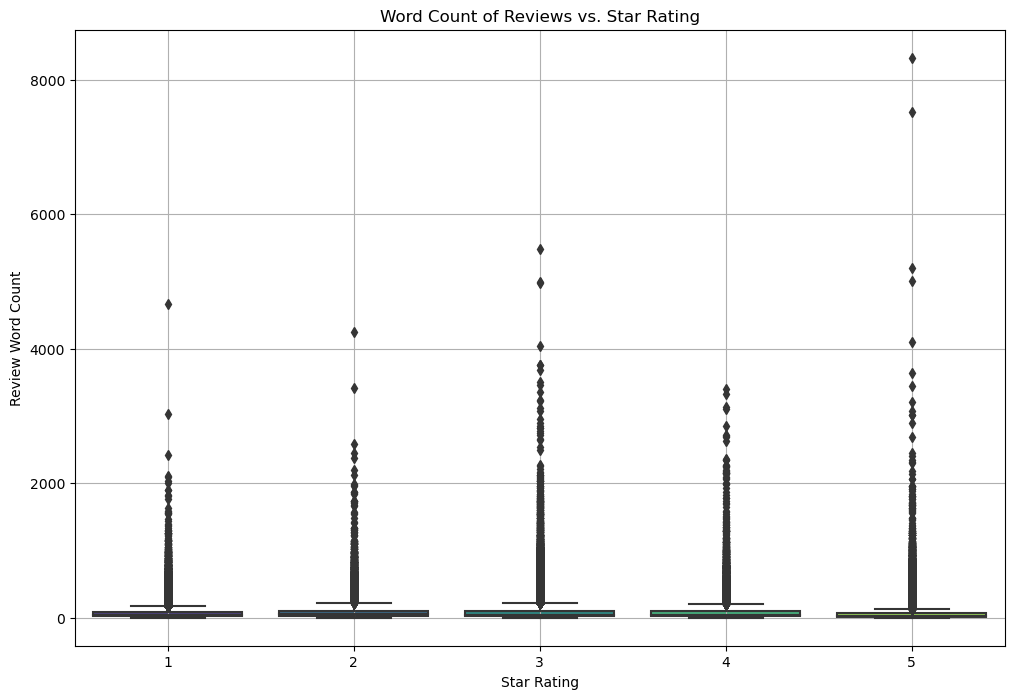

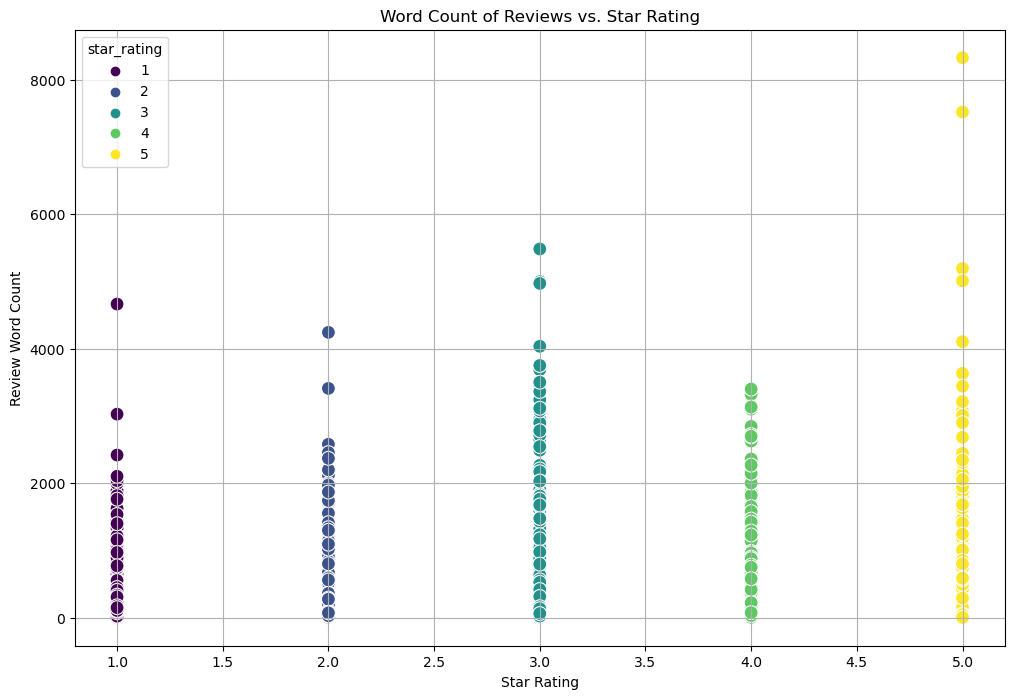

In [29]:

# Calculate word count of reviews
data['review_word_count'] = data['review_body'].apply(lambda x: len(x.split()))

# Plotting a box plot for Word Count of Reviews vs. Star Rating
plt.figure(figsize=(12, 8))
sns.boxplot(x='star_rating', y='review_word_count', data=data, palette='viridis')
plt.title('Word Count of Reviews vs. Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Word Count')
plt.grid(True)
plt.show()

# Alternatively, plotting a scatter plot for Word Count of Reviews vs. Star Rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='star_rating', y='review_word_count', hue='star_rating', palette='viridis', data=data, s=100)
plt.title('Word Count of Reviews vs. Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Word Count')
plt.grid(True)
plt.show()


# Analyze with a Word Cloud
 
## Popular Features:
 
### Words like "headphone," "HDMI," "Cable," or "MP Player"
 
### may indicate frequently discussed product aspects.
 
### Larger words suggest features customers focus on most (positively or negatively).
 
## Customer Sentiments:
 
### Positive terms like "great," "amazing," or "durable" can indicate satisfaction.
 
### Negative terms like "poor," "slow," or "broken" highlight common complaints.
 
## Product-Specific Keywords:
 
### Brand names, specific technologies (e.g., "OLED," "Bluetooth"), or versions (e.g., "Pro," "Max") might appear prominently.
 
## Common Issues:
 
### Words like "return," "replace," or "defective" highlight frequent problems.

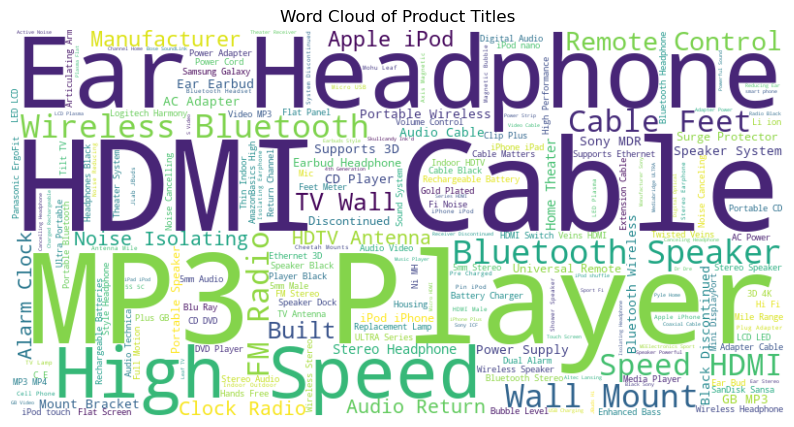

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for product titles
text = " ".join(title for title in data.product_title)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Titles')
plt.show()


#  Helpfulness Ratio vs. Review Length
## helpfulness_ratio = helpful_votes/total_votes
## As we can see the lower review length will have the more helpness ratio because people
## tends to prefer reading the shorter review adn finds it more useful as compare to the longer once

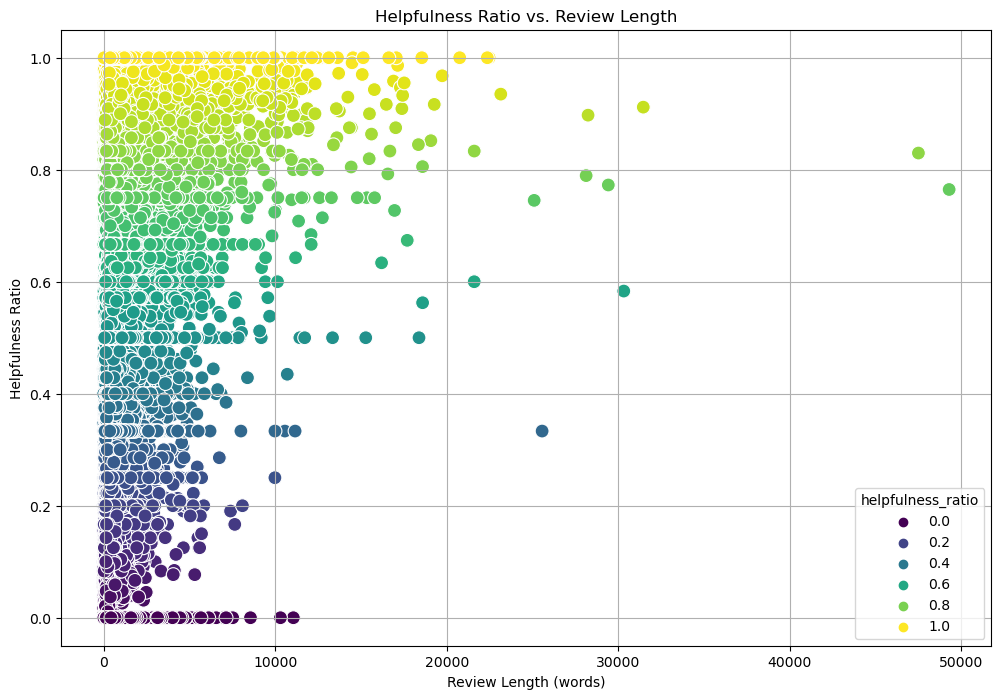

In [31]:

# Calculate helpfulness ratio
data['helpfulness_ratio'] = data['helpful_votes'] / data['total_votes']

# Plotting Helpfulness Ratio vs. Review Length using seaborn for a more attractive plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='review_length', y='helpfulness_ratio', hue='helpfulness_ratio', palette='viridis', data=data, s=100)
plt.title('Helpfulness Ratio vs. Review Length')
plt.xlabel('Review Length (words)')
plt.ylabel('Helpfulness Ratio')
plt.grid(True)
plt.show()
